
<img src='graphics/visualization_python.png' width=450>

>***Caveat***: Over the last few years, visualization in Python has made major strides forward. It is easy to find some high powered and beautiful visualization libraries for Python on the Internet. We will not look at all of them YET. We need to focus our efforts on learning the basics and the most common data visualization libraries (Matplotlib as the base and Seaborn as the next level up). In time, we will cover many more visualization libraries and techniques. 

# Data Visualization - Part 2 - Seaborn

In our last meet-up, we introduced the Matplotlib library for plotting. While Matplotlib library is robust and allows us to do quite a lot, the plots are not refined and would not be anyone's first choice for publishing. This is where Seaborn comes into the picture.

>*Seaborn is a Python data visualization library based upon Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics* - Seaborn Documentation

**Additional Reading Resources:**
1. https://towardsdatascience.com/seaborn-lets-make-plotting-fun-4951b89a0c07
1. https://medium.com/@neuralnets/statistical-data-visualization-series-with-python-and-seaborn-for-data-science-5a73b128851d

If you are not already a subscriber or follower of ***Medium e-Magazine*** [https://medium.com/], you will want to not only subscribe, but also receive their alerts. They have several sections on 
1. data science [https://towardsdatascience.com/], 
1. data visualization [https://towardsdatascience.com/data-visualization/home], and 
1. machine learning [https://towardsdatascience.com/machine-learning/home]

They also cover 
1. Python programming [https://towardsdatascience.com/search?q=Python]
1. Juypter Notebooks [https://towardsdatascience.com/search?q=Jupyter%20Notebook]

as well as other related topics. 

___

## Import Data

For our exercises in this notebook, we are going to use the **California Housing Dataset** from Kaggle [https://www.kaggle.com/camnugent/california-housing-prices#], which is located in the `data/` sub-directory. 

Your first step is to 
1. import the dataset into a DataFrame, which we will call 'df'
1. examine the shape of the DataFrame
1. examine the column names and the first five (5) rows of the DataFrame


In [27]:
import pandas as pd 

df = pd.read_csv('data/housing.csv')
print('DataFrame Shape:', df.shape, '\n')
print('Columns:',df.columns, '\n')
display(df.head())

DataFrame Shape: (20640, 10) 

Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object') 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Seaborn

## Load the necessary libraries

Since Seaborn is based on Matplotlib, we first need to import Matplotlib, then we need to import Seaborn, and because we are working in Jupyter Notebooks, we finish off the libraries load with `%matplotlib inline` so we can see our work.

(**Note:** If when you loaded Seaborn you received a pink box with warnings, you can run the warnings block to suppress those warnings in the future of this notebook. Receiving the warnings will not affect anything more than the appearance of your notebook.) 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


# Suppress the warnings we may receive in this example about an update and depreciation
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline 

## Scatter Plot

The scatter plot is used when we want to show the relationship between two features or a feature and a label. The *basic* command for Seaborn is simple. 

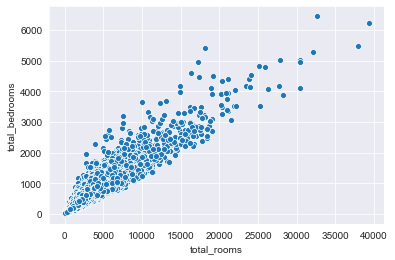

In [30]:
sns.scatterplot(data=df, x='total_rooms', y='total_bedrooms')
plt.show()

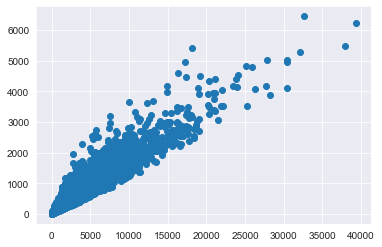

In [31]:
x = df['total_rooms']
y = df['total_bedrooms']

plt.scatter(x, y)
plt.show()

### A Few Aesthetics

Plotting a basic scatter plot is simple enough, but let's add in some additional aestheics and information to our plot in order to really bring out the power of Seaborn.

1. Let's increase the size of the plot so it is a bit easier to see.
1. Let's make the size of each dot based upon 'median_house_value' (bringing in another data value)
1. Color the dots based upon 'ocean_proximity'
1. And base the style of the markers based upon 'ocean_proximity'
1. Add main and axes titles

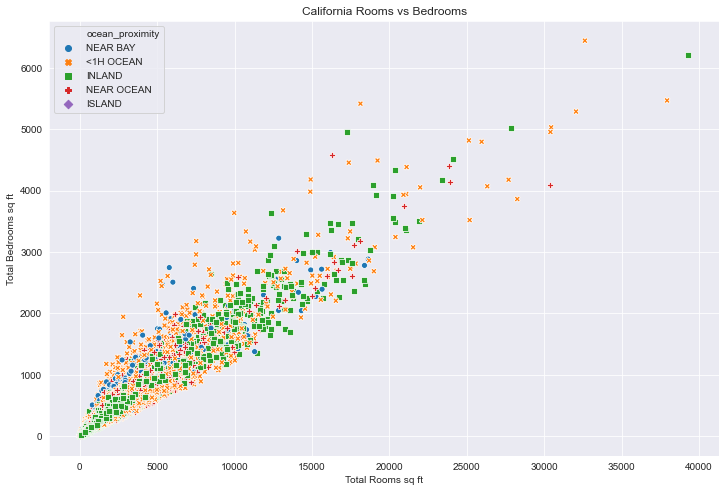

In [36]:
plt.figure(figsize=(12,8)) #Sets a new figure size away from the default

sns.set_style("darkgrid")#*Sets the grid to dark with lines

sns.scatterplot(data = df, # Calls the data source
               x = 'total_rooms', # Declares x
               y = 'total_bedrooms',# Declares y
               hue = 'ocean_proximity',# Declares another variable by color
               style = 'ocean_proximity')# Declares another variable by shape

# Add some clarifying features
plt.title('California Rooms vs Bedrooms')
plt.xlabel('Total Rooms sq ft')
plt.ylabel('Total Bedrooms sq ft')
plt.show()

## Bar Plot (or Count Plot)

Bar plots, sometimes called a Count plot, automatically count the data points based upon a certain categorical column and present the data as a bar plot. Bar or Count plots are used when you are totalling the count of observations within a category or condition. 

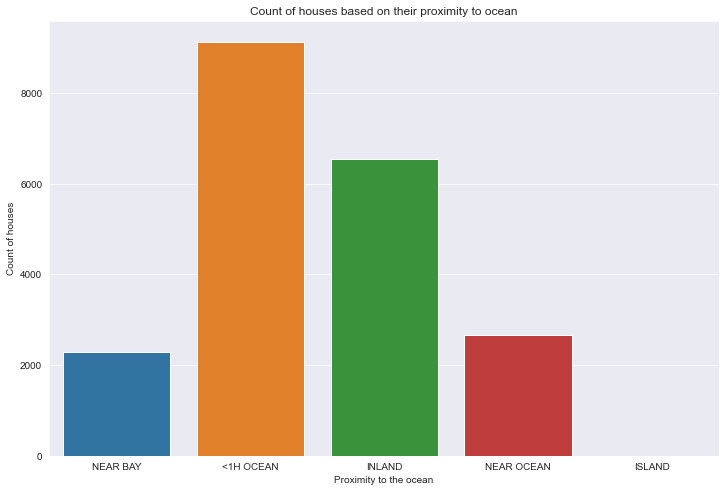

In [5]:
#Basic count plot (bar chart) with external labels

plt.figure(figsize = (12, 8)) #Establish the size of the graphic

sns.countplot(data = df, x = 'ocean_proximity')# Actual line that draws the count plot


#Adding some clarifying elements
plt.title("Count of houses based on their proximity to ocean")
plt.xlabel("Proximity to the ocean")
plt.ylabel("Count of houses")
plt.show()

Simple to do, as you can see. But what if we want to add the count to the ends of each of the bars (that is always a good idea for clarity in our graphics). In the next block of code, we will do that. 

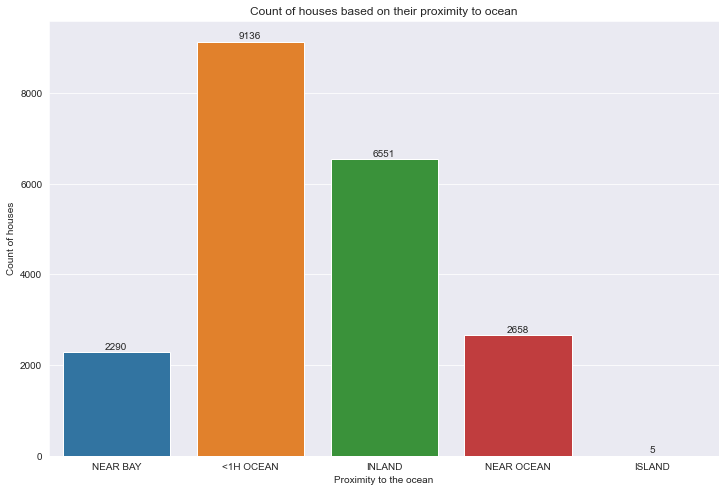

In [6]:
plt.figure(figsize = (12, 8))# Adjust the figure size

#Draw the actual plot and assign that action to the variable 'ocean_plot'
ocean_plot = sns.countplot(data = df, x = 'ocean_proximity')  

'''
The next FOR loop establishes the location for placing the counts, then places those counts centered at
the end of each bar respectively. 

'''

for p in ocean_plot.patches:# patches are a library of commands for aesthetics in plots
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), #Setting width of bars so they are proportional
                        ha = 'center', #horizontal axis
                        va = 'center', # vertical axis
                        xytext = (0, 5), # placing the text
                        textcoords = 'offset points')

    
    # And, of course, we add our clarifying features (labels)
plt.title("Count of houses based on their proximity to ocean")
plt.xlabel("Proximity to the ocean")
plt.ylabel("Count of houses")
plt.show()

So we don't rush over the code to add the count to the ends of each column, let's take a moment and run just the FOR loop, printing out the 'p' variable to see what is 'p'. Remember that 'p' will be used in the following annotation set-ip

>ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                        p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

In [7]:
for p in ocean_plot.patches:
    print(p)

Rectangle(xy=(-0.4, 0), width=0.8, height=2290, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=9136, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=6551, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=2658, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=5, angle=0)


## Histograms

Histograms are an effective way to show continuous points of data and see how they are distributed. The `dist` plot in Seaborn produces both a histogram as well as a density line on that plot based on the data. 

Since Histograms require us to define the number of total sorting bins, we defined a total number of 10 bins for `median_house_value` .

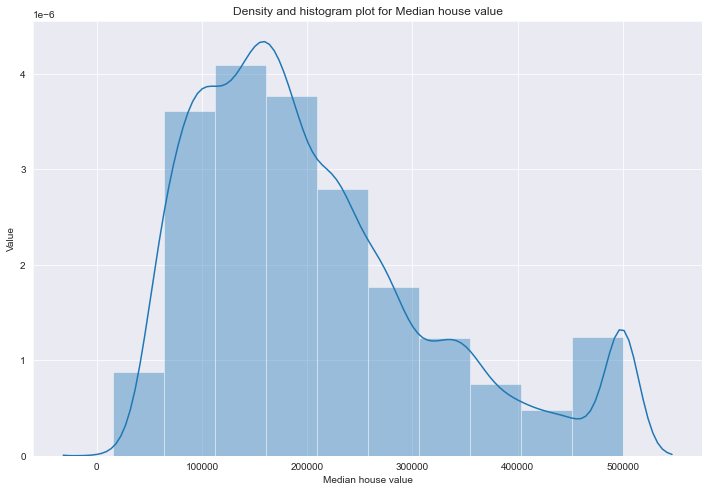

In [43]:
#Set the figsize to a 12x8 so it is clearly visible
plt.figure(figsize = (12, 8))

#The actual line of code that draws the historgram
sns.distplot(a = df['median_house_value'], 
             bins = 10, 
             hist = True,
             kde = True,
            )

#Adding some clarifying features (labels)
plt.title("Density and histogram plot for Median house value")
plt.xlabel("Median house value")
plt.ylabel("Value")
plt.show()

Quite simple. But let's add a little color and pleasing aestheics to our Histogram. 
1. Change the color of our Histgram to 'red'
1. Add borders to each bin


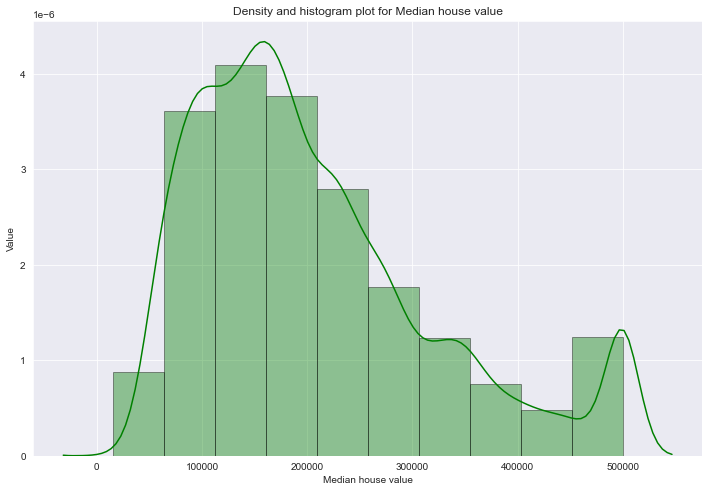

In [47]:
#Set the figsize to a 12x8 so it is clearly visible
plt.figure(figsize = (12, 8))

#The actual line of code that draws the historgram
sns.distplot(a = df['median_house_value'], 
             bins = 10, 
             hist = True,
#              kde = False,
             color='g',
             hist_kws=dict(edgecolor='k', linewidth=1))

#Adding some clarifying features (labels)
plt.title("Density and histogram plot for Median house value")
plt.xlabel("Median house value")
plt.ylabel("Value")
plt.show()

## Boxplot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<img src='graphics/boxplot_explained.png'>

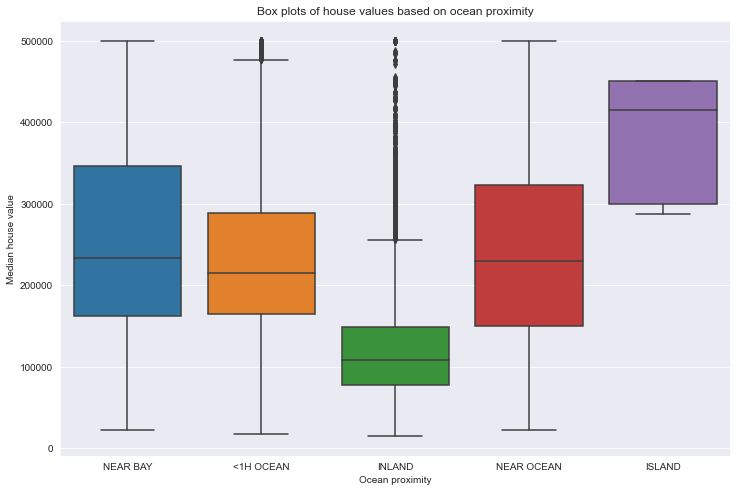

In [10]:
plt.figure(figsize = (12, 8))


sns.boxplot(x = 'ocean_proximity', 
            y = 'median_house_value',
            data = df,  
              )


plt.title("Box plots of house values based on ocean proximity")
plt.xlabel("Ocean proximity")
plt.ylabel("Median house value")
plt.show()

## Violin Plot

For most people, a Violin Plot is an obscure, strange looking, never used plot. I believe this would not be the case if Excel had violin plots as a part of the standard selection. But because of this, and their strange look, we rarely see these plots outside of more serious Data Science. 

Violin plots are another representation of the distribution of a set of observations.

Let's look at how to draw a violin plot first, then we will discuss how to read it (which is quite simple). After that, we will discuss how easy it makes comparing values.

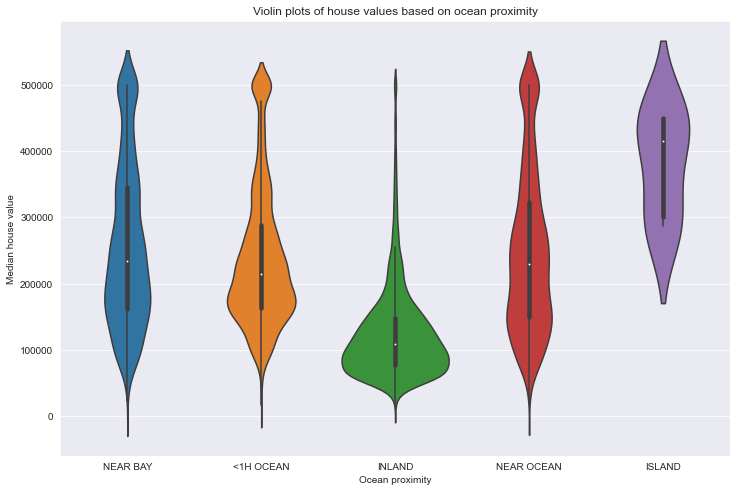

In [11]:

plt.figure(figsize = (12, 8))# Set the figure size


sns.violinplot(data = df, #Set the data source
               x = 'ocean_proximity', #Set the x variable
               y = 'median_house_value', #Set the y variable
              )

#Add clarifying features
plt.title("Violin plots of house values based on ocean proximity")
plt.xlabel("Ocean proximity")
plt.ylabel("Median house value")
plt.show()

Before we move ahead, let’s talk about how to understand these plots. 

Consider the green plot `INLAND`. 
1. The black line that extends from zero to approximately 250000 is the 95% confidence interval. 
1. The thick black block inside is the interquartile range meaning approximately 50% of all data lies in this range. 
1. The width of the plot is based on the density of the data. 

We can understand it as the histogram of this specific dataset with the black line as the x-axis that is completely smoothed out and turned 90 degrees.

## Heatmap or Correlation Matrix

I have to admit that a Heatmap (or, more appropriately, a Correlation Matrix) is one of my favorite graphics. It is also my first go-to graphics for conducting an Exploratory Data Analysis (EDA) on data sets with a considerable number of quantitative categories. 

A correlation matrix helps us see how all features and labels are related to one another and the level of dependance. 

The Pandas DataFrame has a function called `corr()`, which generates a correlation matrix. When we input that Pandas correlation matrix to the Seaborn heatmap, we get a beautiful heatmap. 

Setting `annot` as **True** ensures that the correlations are also defined with numbers.

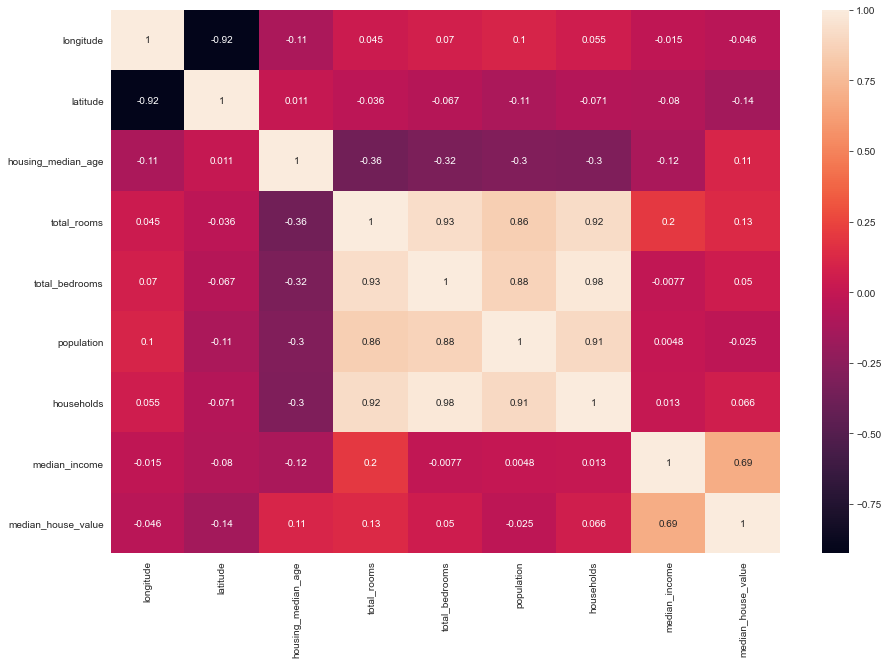

In [12]:

plt.figure(figsize = (15,10))#Set the figure Size


sns.heatmap(df.corr(), annot = True)#Note the .corr()
plt.show()

**NOTE**: *Do you see how the top and bottom rows in the correlation matrix are cut off? This was a `matplotlib` regression introduced in version 3.1.1, which has been fixed in version 3.1.2 (still forthcoming). For now the fix is to downgrade `matplotlib` to a prior version, unless you can live with this for a few more months until the fix is available.*

## Joint Plot

A Joint Plot is a combination of scatter plot along with the density plots (histograms) for both features we’re trying to plot. 

The Seaborn’s Joint Plot allows us to even plot a linear regression all by itself using `kind` as `reg`. 

We defined the square dimensions using height as 8 and color as green.

### JointPlot Regression

<Figure size 864x720 with 0 Axes>

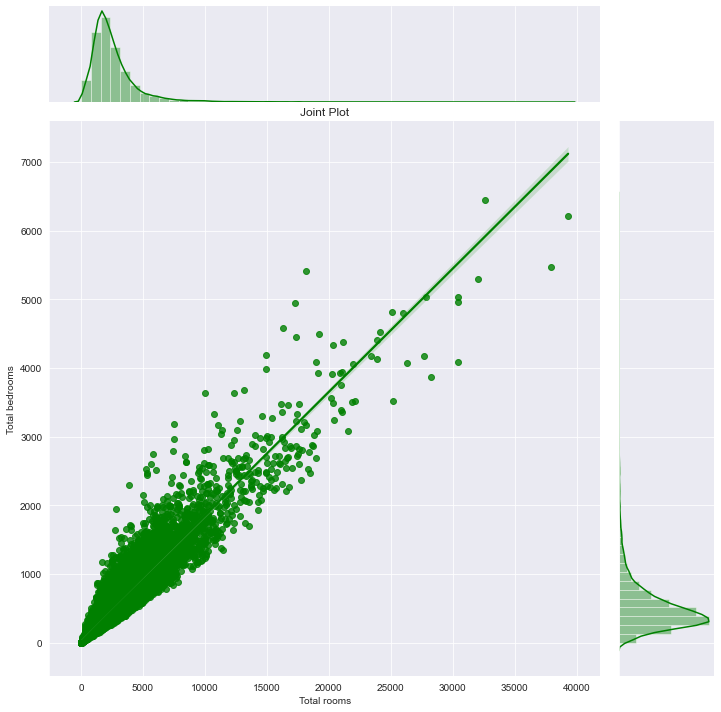

In [13]:

plt.figure(figsize=(12,10))# Set the figure size larger than default

sns.jointplot(data=df, #Declare the dataset
              x = "total_rooms", #Declare the x value
              y = "total_bedrooms", #Declare the y value
              kind="reg", #kind = regression
              height = 10, #Set the height of the plot
              color = 'g',#Set the color as green
             )

#Add some clarifying aspects
plt.title('Joint Plot')
plt.xlabel("Total rooms")
plt.ylabel("Total bedrooms")
plt.show()

### Joint Plot Scatter

<Figure size 864x720 with 0 Axes>

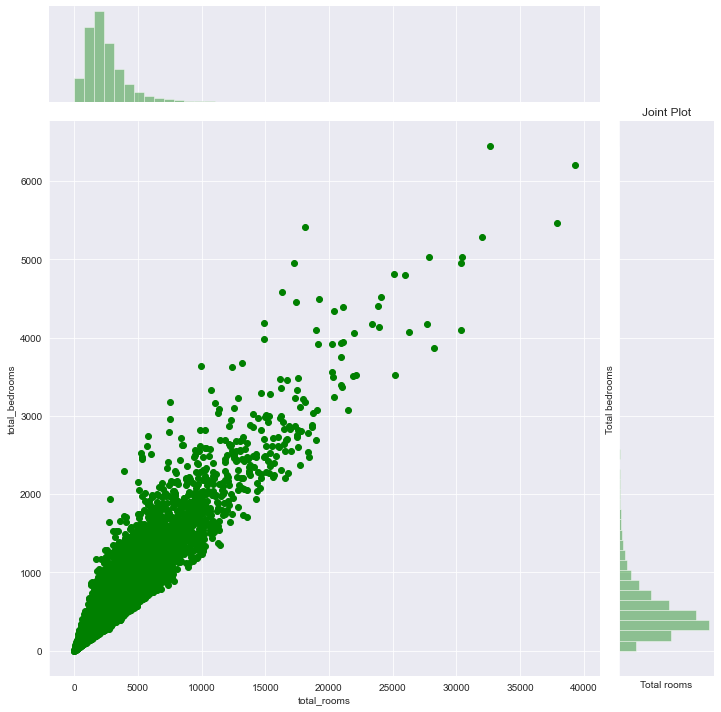

In [14]:
plt.figure(figsize=(12,10))# Set the figure size larger than default

sns.jointplot(data=df, #Declare the dataset
              x = "total_rooms", #Declare the x value
              y = "total_bedrooms", #Declare the y value
              kind="scatter", #kind = scatter
              height = 10, #Set the height of the plot
              color = 'g',#Set the color as green
             )

#Add some clarifying aspects
plt.title('Joint Plot')
plt.xlabel("Total rooms")
plt.ylabel("Total bedrooms")
plt.show()

## Pairplot

A Pairplot is another one of my immediate go-to plots for EDAs (Exploratory Data Analyses). A pair plot takes every numeric category in our dataset and plots that value against every other numeric value. 

In one plot, we see trends and patterns quite easily. 

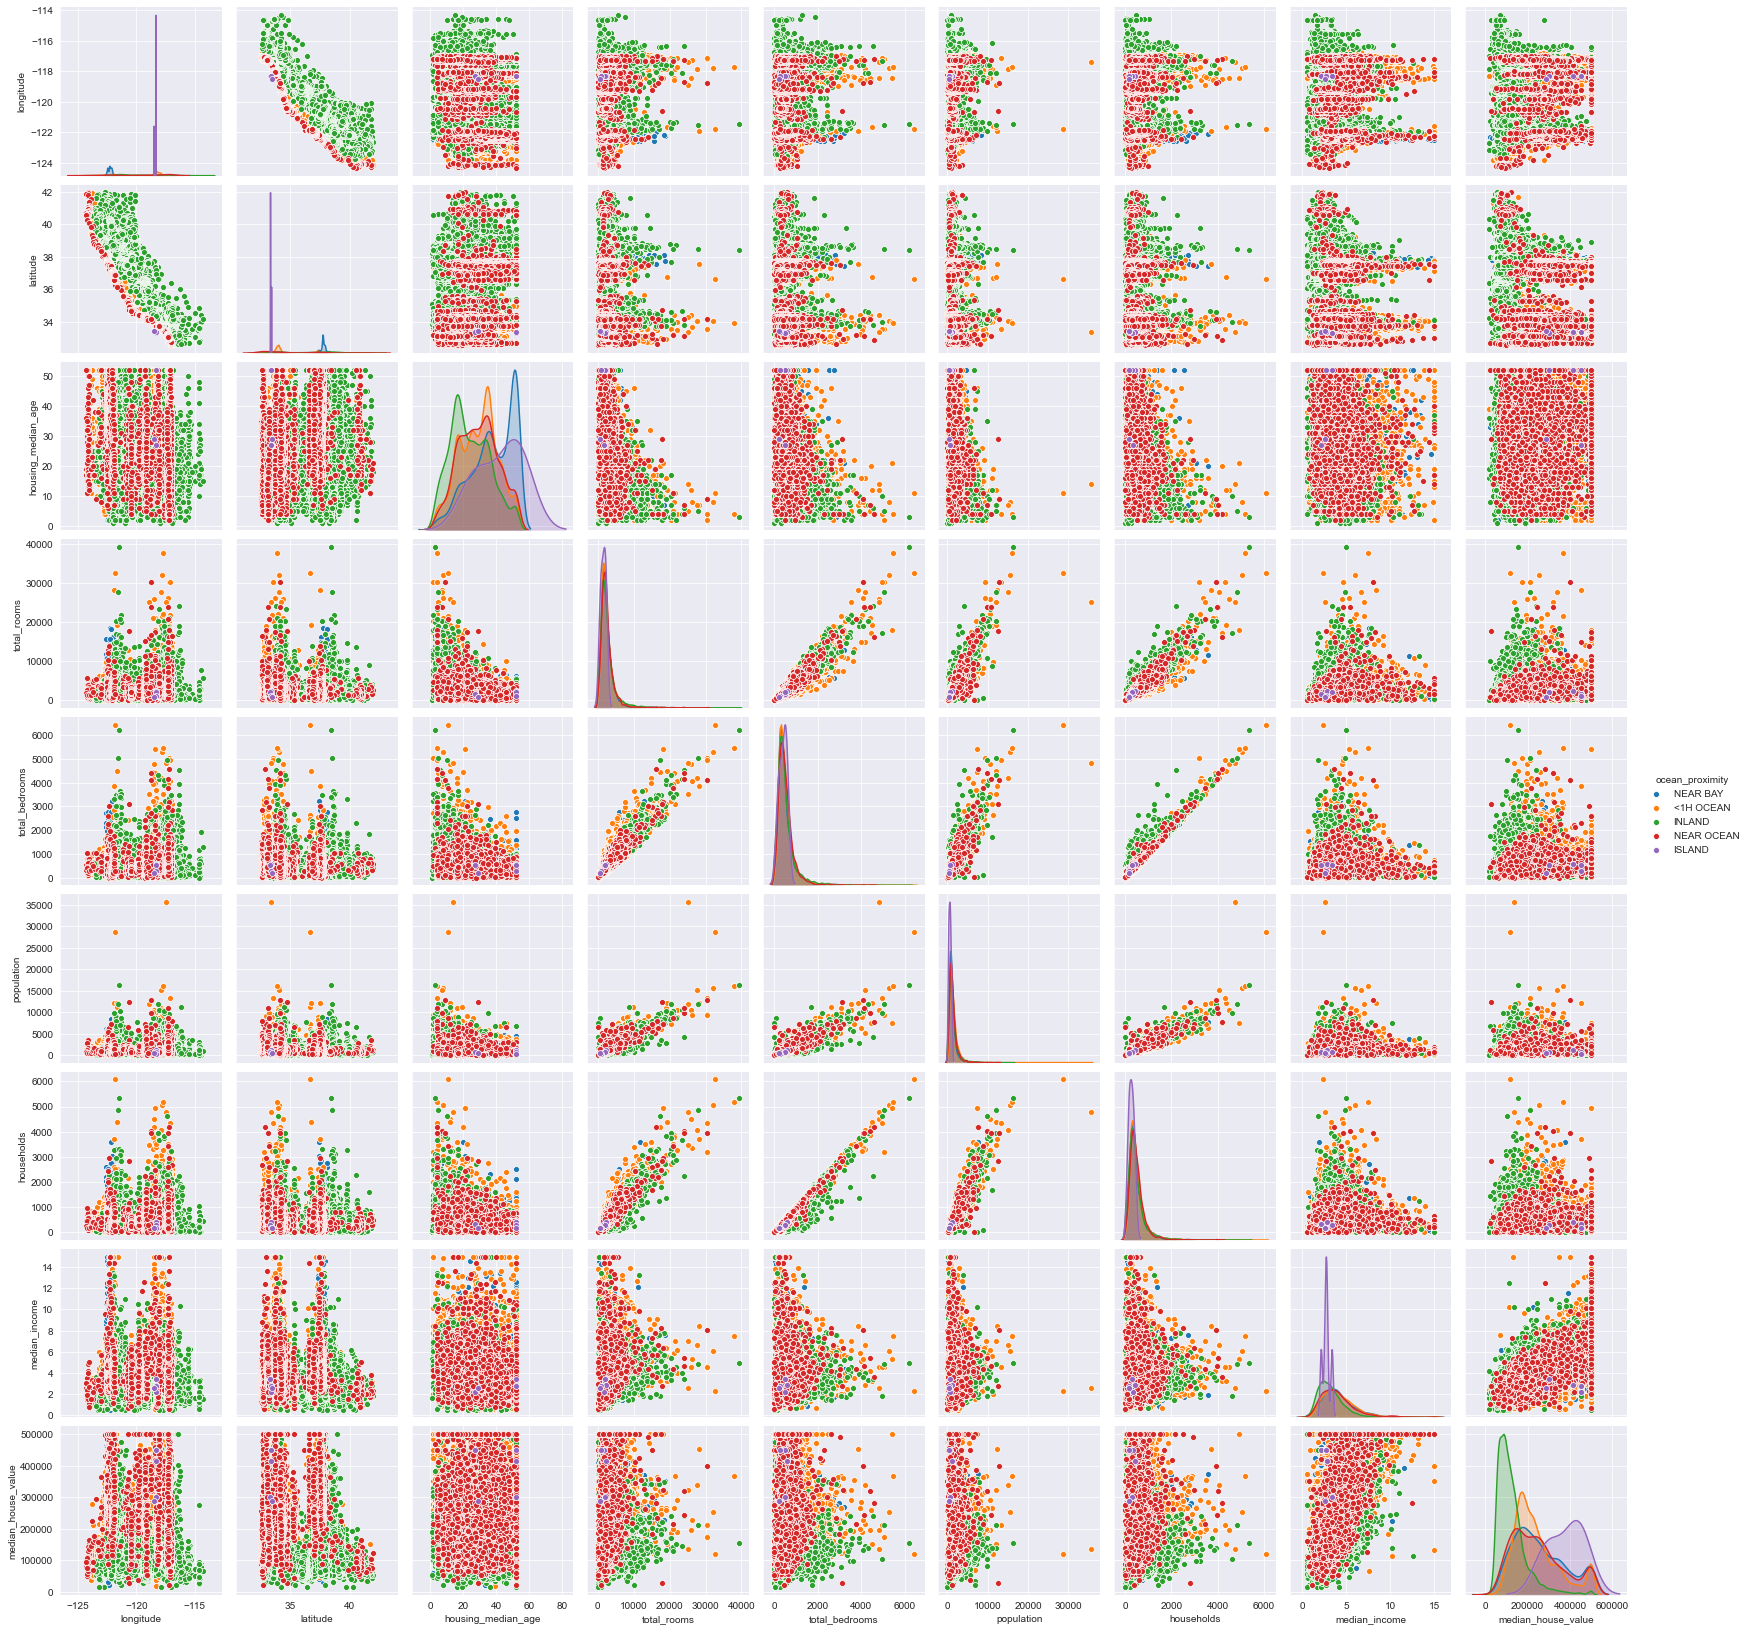

In [15]:
sns.pairplot(df, 
            hue = 'ocean_proximity',# Declares another variable by color (not necessary)
            kind = 'scatter', #Scatter representation is the default. You don't need to declare it. 
            )
plt.show()

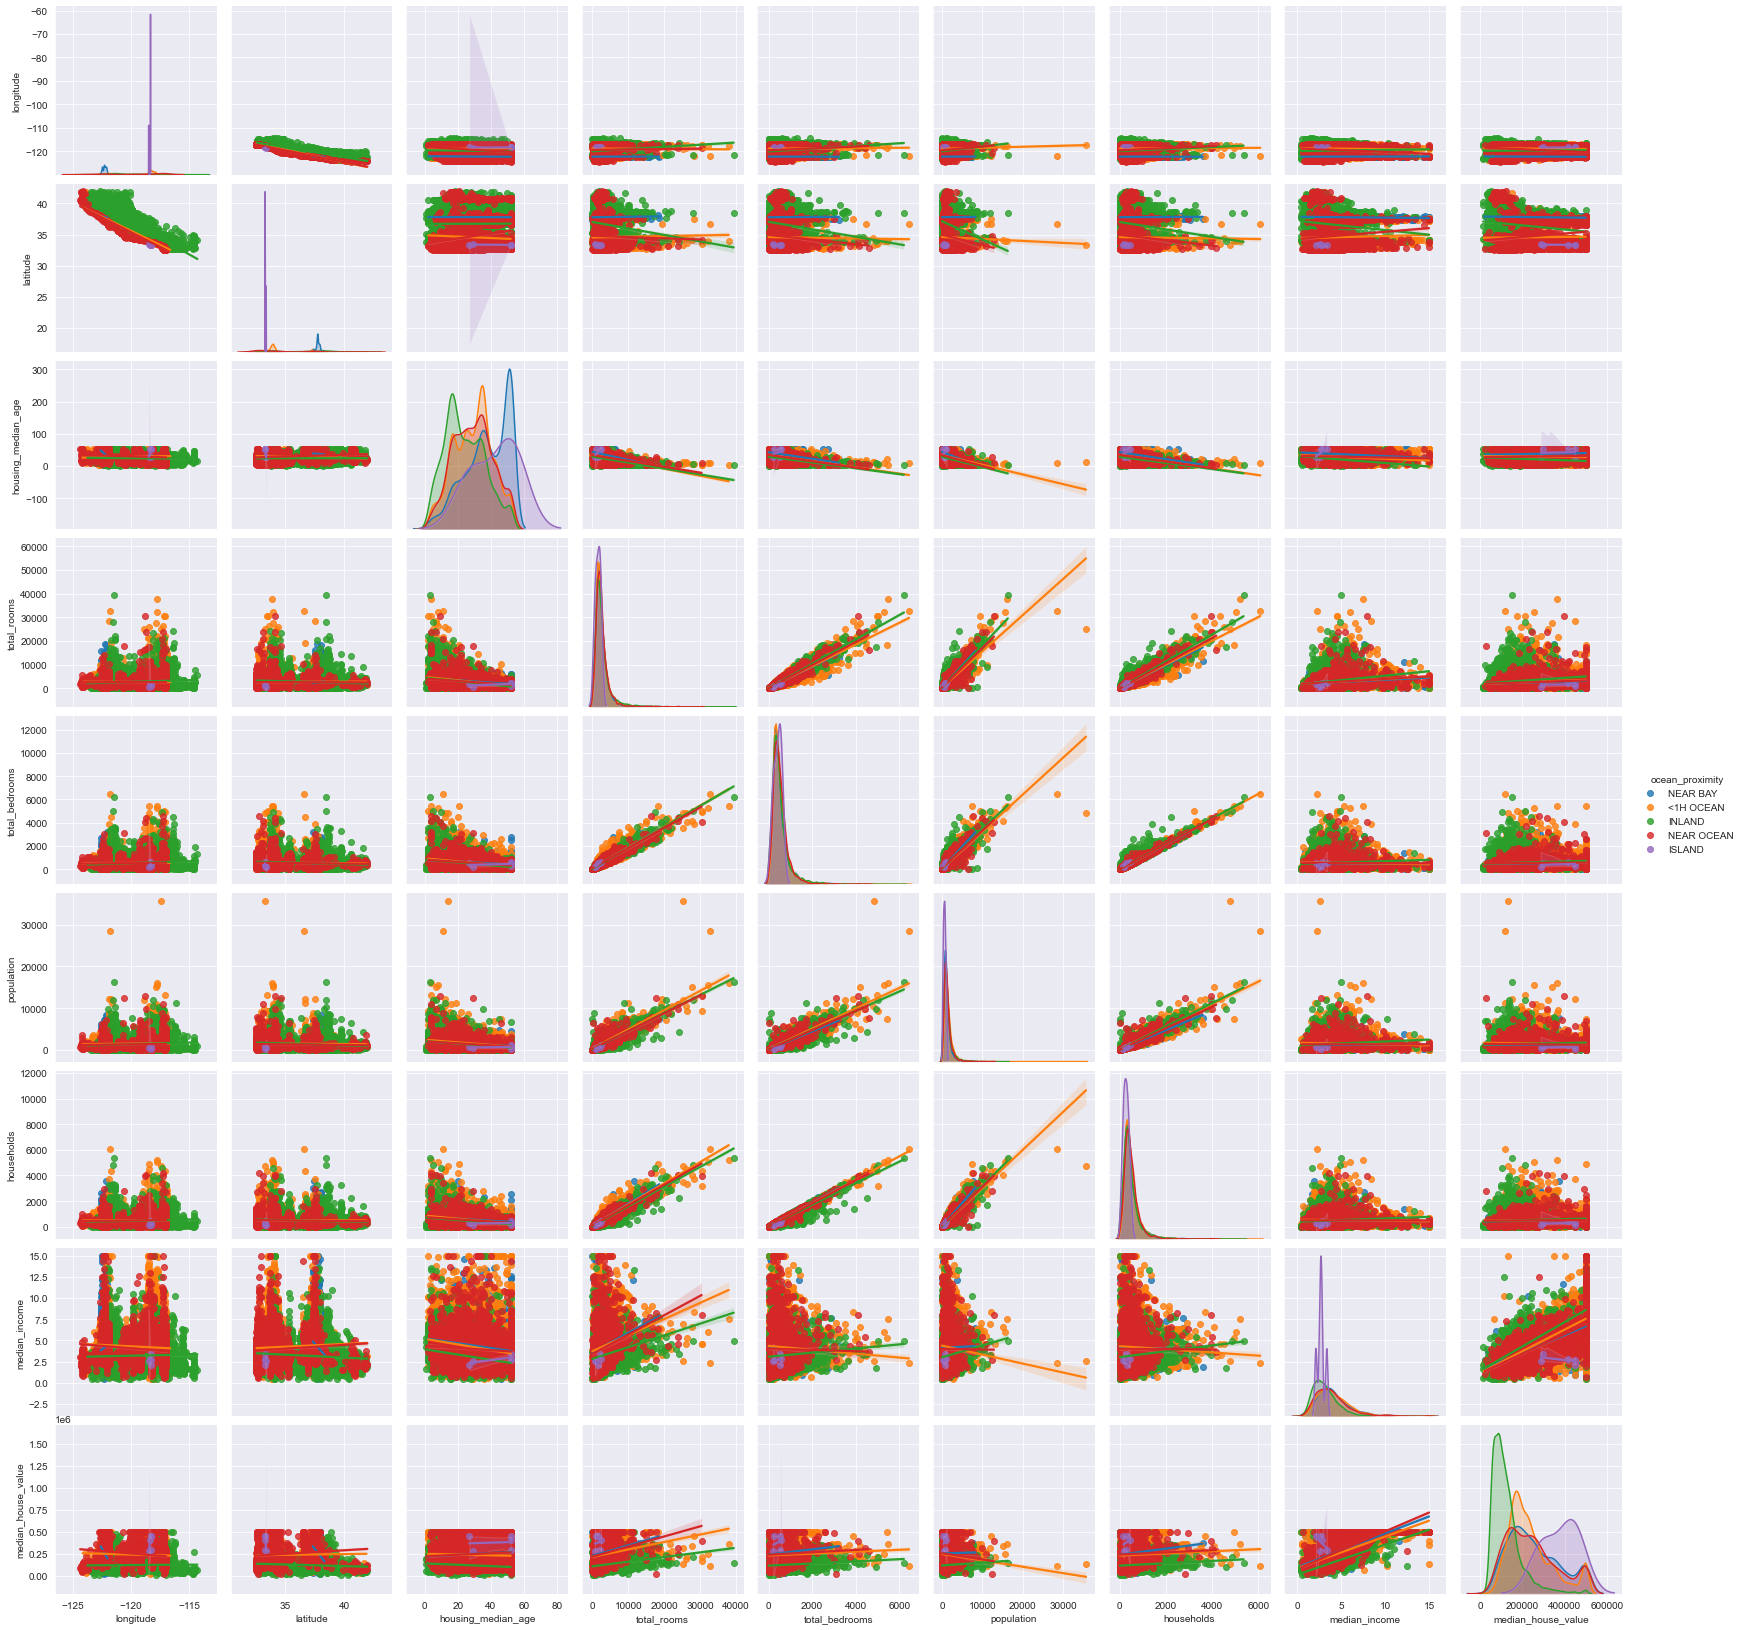

In [16]:
sns.pairplot(df, 
            hue = 'ocean_proximity',# Declares another variable by color (not necessary)
            kind = 'reg', #reg representation gives you the regression line. You need to declare it. 
            )
plt.show()

## Swarmplot

A Swarmplot is a scatter plot where the *x* axis is a categorical value. 

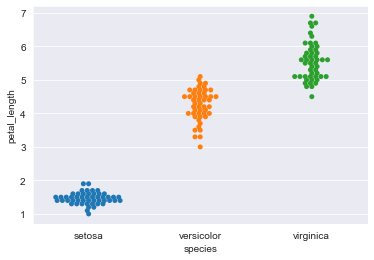

In [17]:
# Load a built in Dataset
iris = sns.load_dataset('iris')

sns.swarmplot(data = iris, 
               x = 'species', 
               y = 'petal_length', 
             )
plt.show()

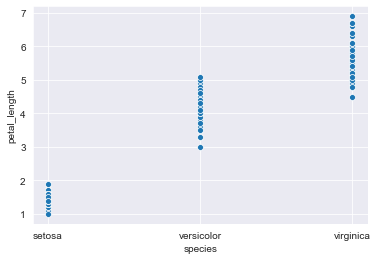

In [18]:
sns.scatterplot(data = iris, 
               x = 'species', 
               y = 'petal_length', 
               )

plt.show()

# Charts Starter

We have covered quite a few different plots and charts in this and the previous lesson. We have attempted to define what they are and when to use them, but we recognize this may still be confusing. 

The following chart is a start in understanding what charts and plots to use given what you are trying to do. This chart comes from [https://flowingdata.com/2009/01/15/flow-chart-shows-you-what-chart-to-use/]. It is not exhaustive, and it does not cover all of the charts/plots which we have covered in our last two meet-ups. However, it will help to organize your thoughts around charts and plots. It will also serve as a good basis for you to begin developing your own cheat sheet on charts and plots. 

<img src='graphics/chart-chart1.jpg'>

# Exercises

Let's practice some of what we have learned.

## Load the Data Set

First,
1. Let's load our needed libraries
1. Let's load the 'ames.csv' dataset (located in the data folder) into a DataFrame
1. Then take a look at the dataset's features to become familiar with them

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/ames.csv', index_col = [0])

display(df)
print(df.shape)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


(2930, 81)


Next, 
1. Plot 'Lot.Area' against 'MS.Zoning'
1. Select the plot that you believe best suits the needs for this representation

(Don't forget to add clarifying features.)

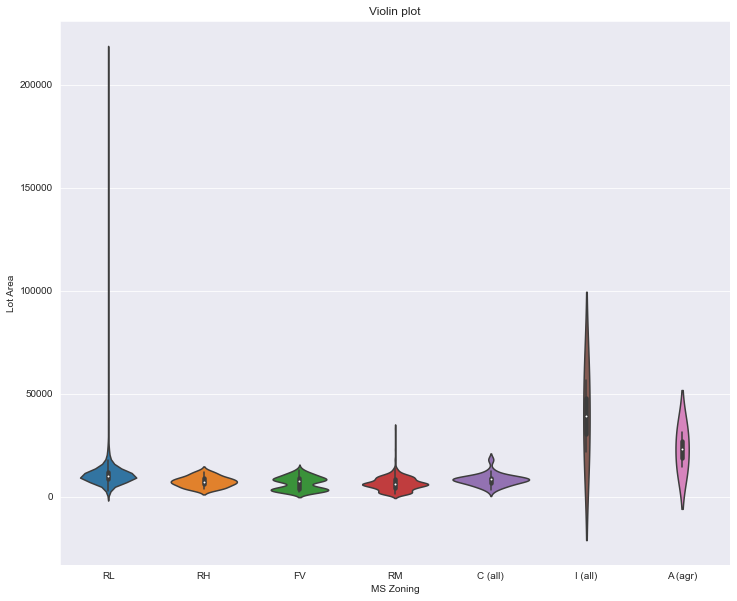

In [20]:
plt.figure(figsize=(12,10))

sns.violinplot(data=df,
             x = 'MS Zoning',
             y = 'Lot Area',
             )

plt.title('Violin plot')
plt.show()

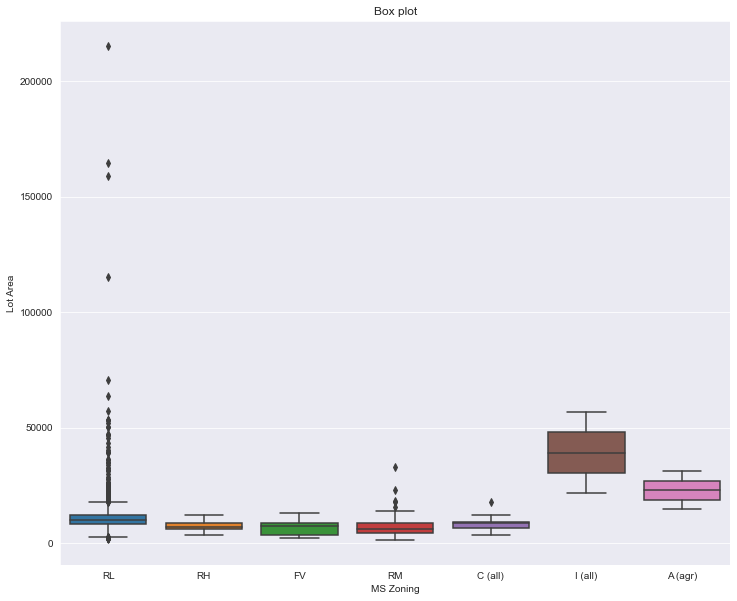

In [21]:
plt.figure(figsize=(12,10))

sns.boxplot(data=df,
             x = 'MS Zoning',
             y = 'Lot Area',
             )

plt.title('Box plot')
plt.show()

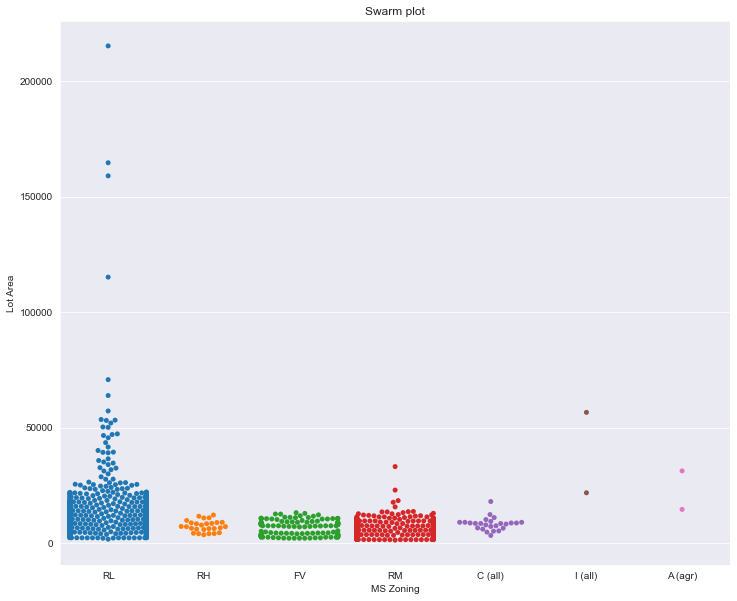

In [22]:
plt.figure(figsize=(12,10))

sns.swarmplot(data=df,
             x = 'MS Zoning',
             y = 'Lot Area',
             )

plt.title('Swarm plot')
plt.show()

Next, we want to look at the relationship between 'SalePrice' and 'Lot.Area'. We are interested in seeing if there is a correlation between the two and what the distribution is for this relationship. Make sure to make the plot large enough to see clearly. And make the color of the plot blue.

<Figure size 864x720 with 0 Axes>

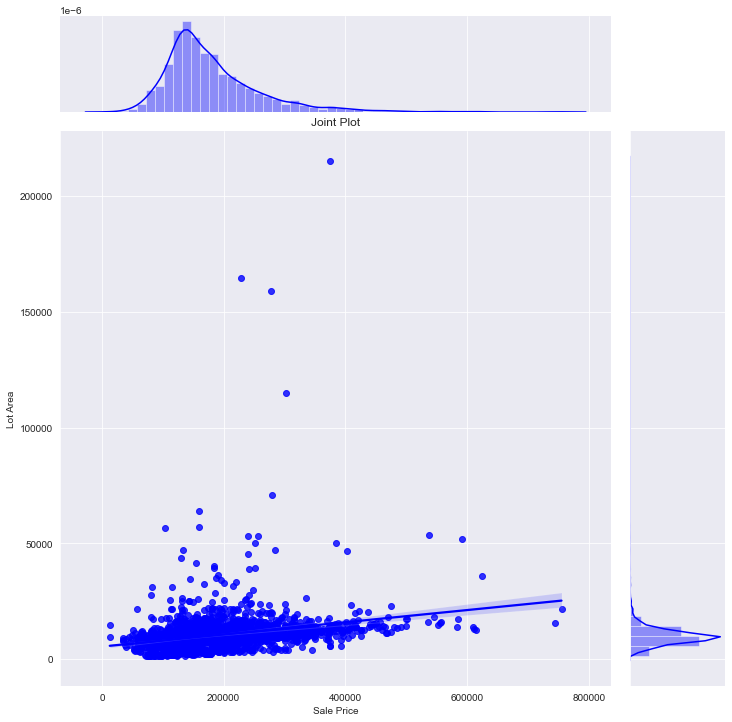

In [23]:
plt.figure(figsize=(12,10))# Set the figure size larger than default

sns.jointplot(data=df, #Declare the dataset
              x = "SalePrice", #Declare the x value
              y = "Lot Area", #Declare the y value
              kind="reg", #Set it as regression
              height = 10, #Set the height of the plot
              color = 'blue',#Set the color as green
             )

#Add some clarifying aspects
plt.title('Joint Plot')
plt.xlabel("Sale Price")
plt.ylabel("Lot Area")
plt.show()